In [ ]:
print('hi')

In [3]:
from training_vae_gans import run
import time
s = time.time()
run(users=[15])
t = time.time()
print(t-s)

Auth user is 15
Fitting basic
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......concatenate
.........vars
......conv1d
.........vars
............0
............1
......conv1d_1
.........vars
............0
............1
......conv1d_10
.........vars
............0
............1
......conv1d_11
.........vars
............0
............1
......conv1d_12
.........vars
............0
............1
......conv1d_13
.........vars
............0
............1
......conv1d_14
.........vars
............0
............1
......conv1d_15
.........vars
............0
............1
......conv1d_16
.........vars
............0
............1
......conv1d_17
.........vars
............0
............1
......conv1d_18
.........vars
............0
............1
......conv1d_19
.........vars
............0
............1
......conv1d_2
.........vars
............0
............1
......conv1d_20
.........vars
............0
............1
......conv1d_21
.........vars
............0
...........

In [ ]:
run(users=[2])

In [ ]:
run(users=[3])

In [2]:
!pip install tensorflow_ranking

In [8]:
from VAE import VAE
vae = VAE(None, None, None, None)
vae.load_model("no_13", "trained_without_user_big_beta")

Keras model archive loading:
File Name                                             Modified             Size
metadata.json                                  2023-02-04 05:20:12           64
config.json                                    2023-02-04 05:20:12         7168
variables.h5                                   2023-02-04 05:20:12       613656
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......conv1d
.........vars
............0
............1
......conv1d_1
.........vars
............0
............1
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......input_layer
.........vars
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......max_pooling1d
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........var

109/109 [==============================] - 1s 3ms/step


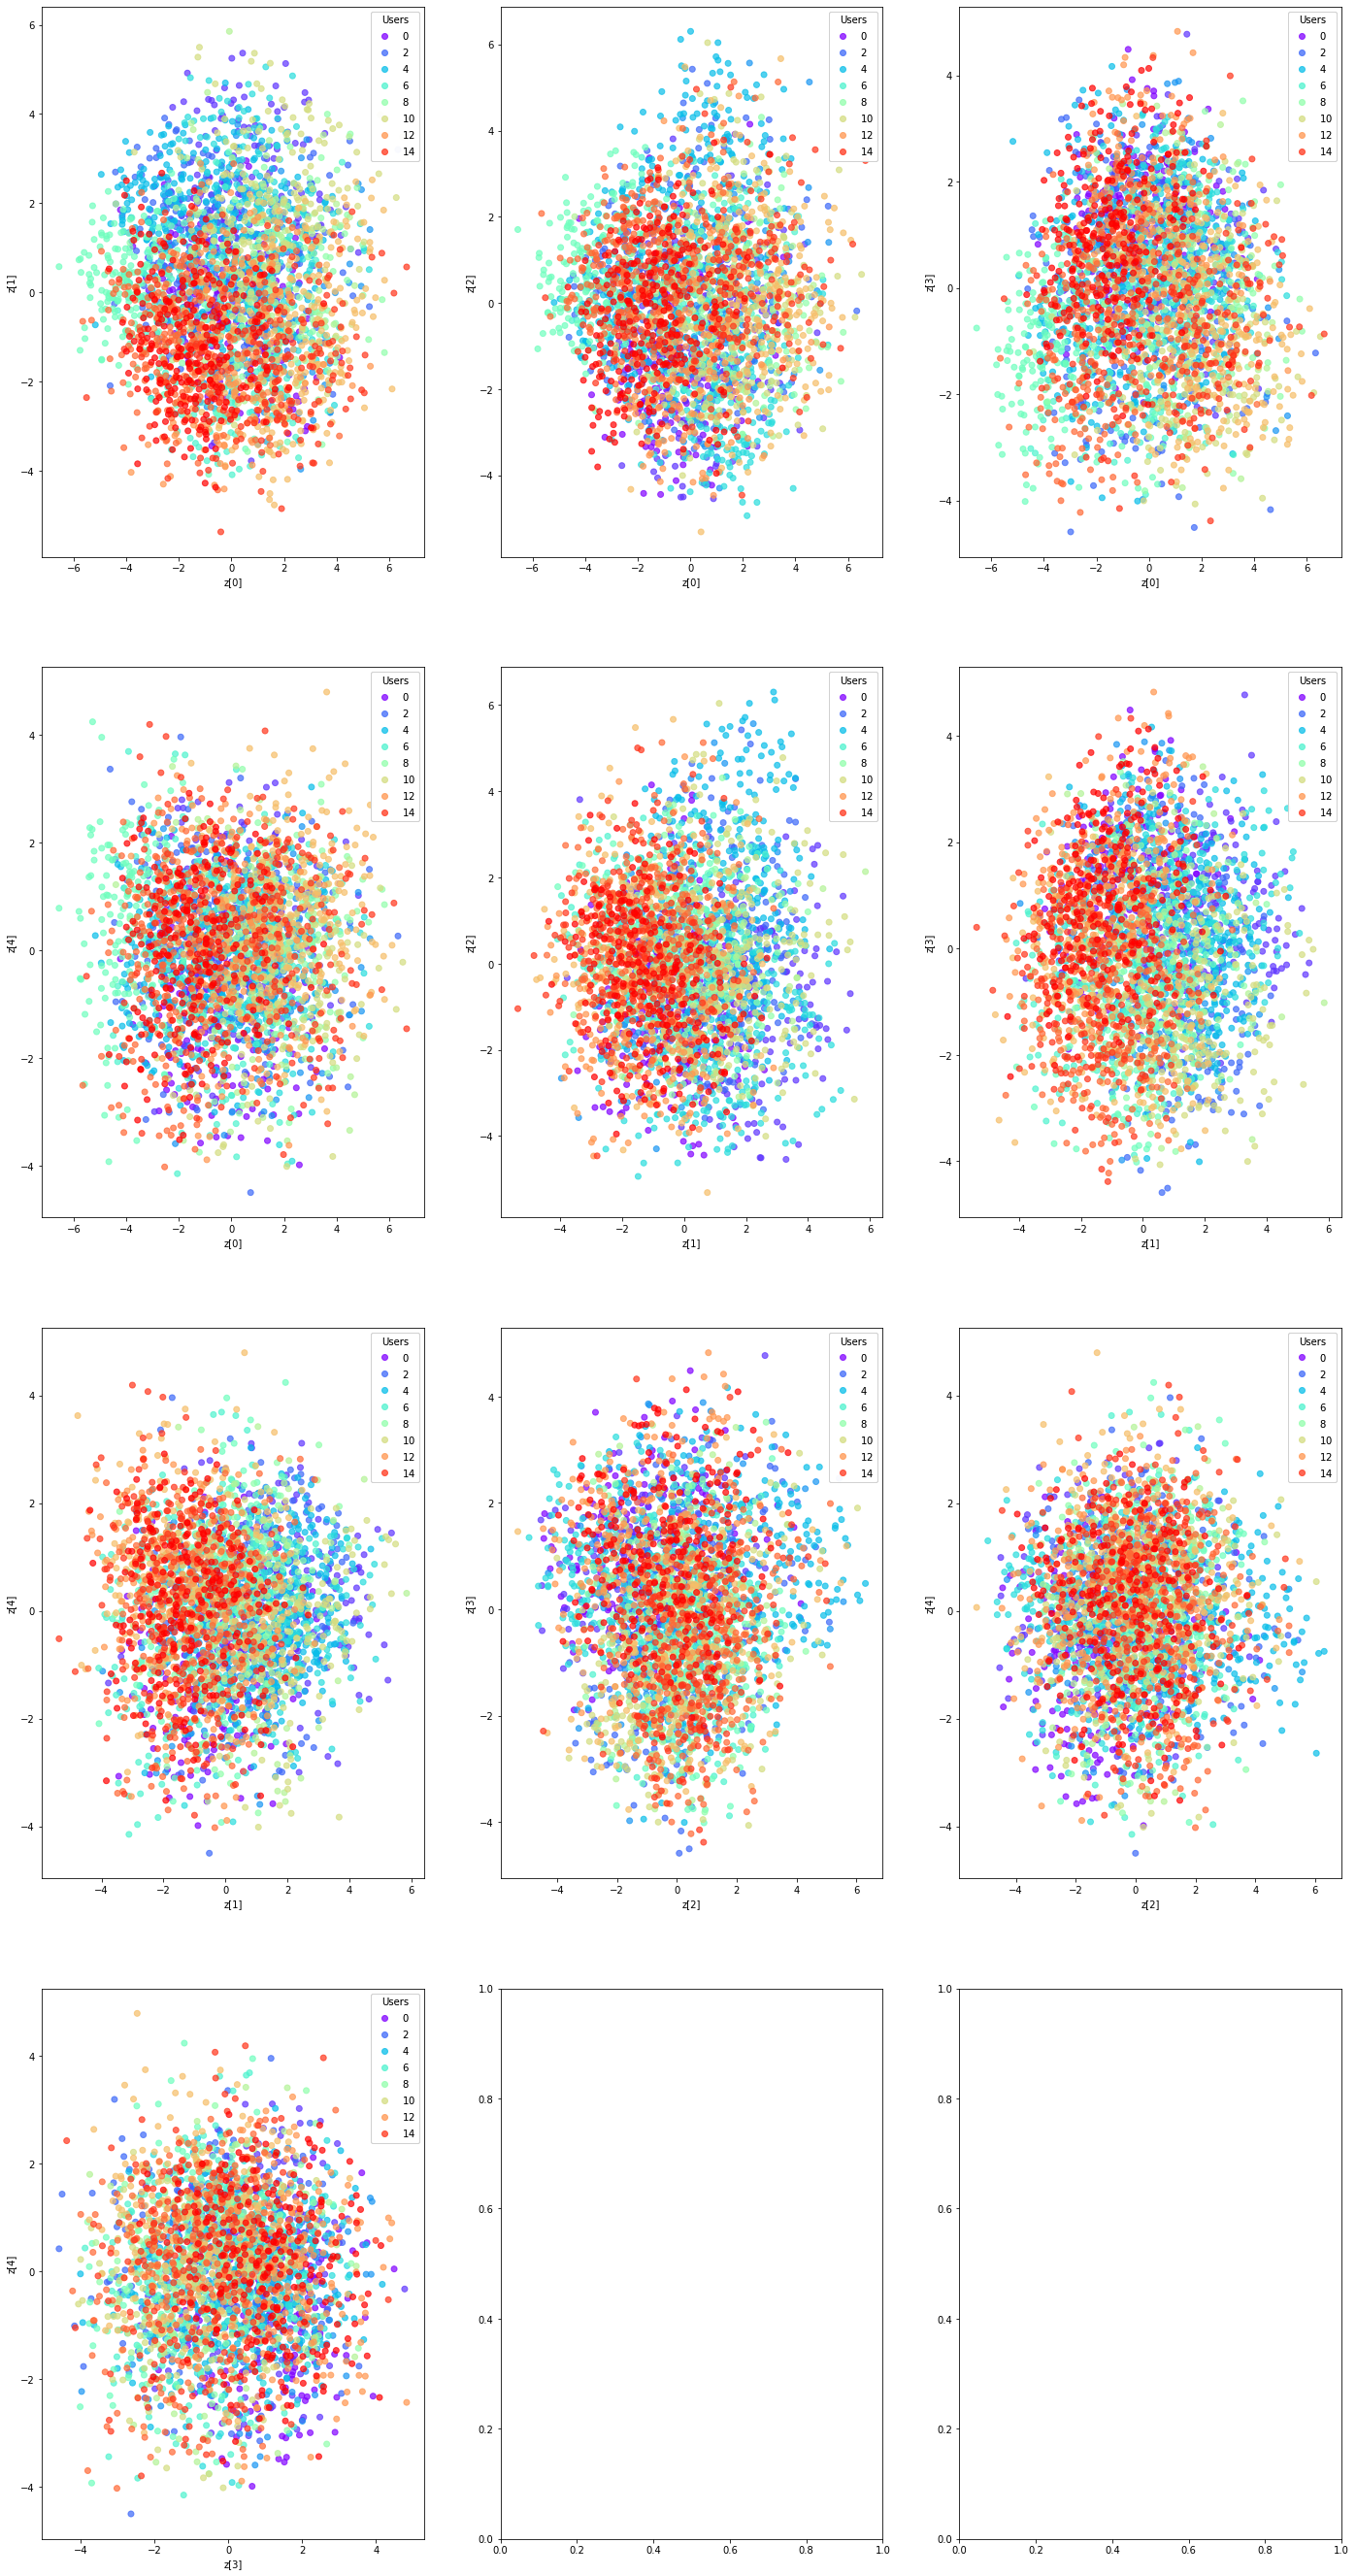

109/109 [==============================] - 0s 2ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


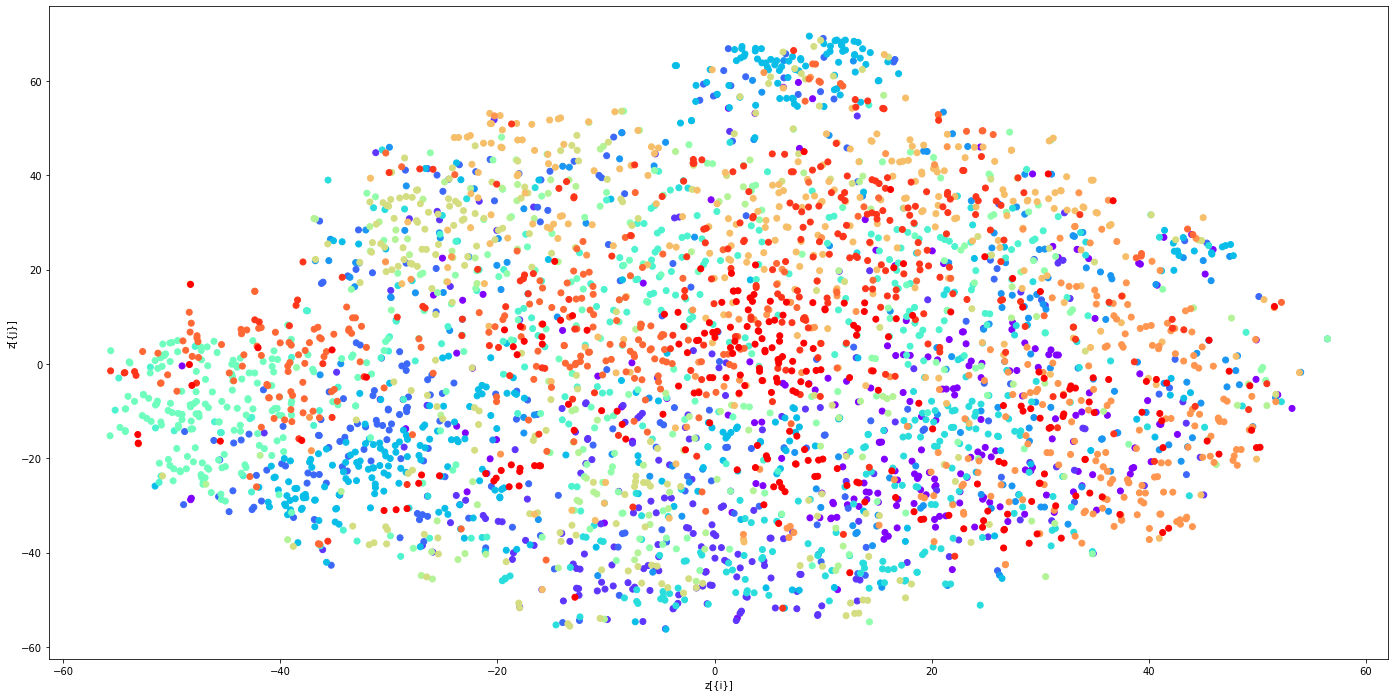

In [9]:
from visualise import *

device_name = tf.test.gpu_device_name()

file_name = "raw_with_maps" # or offsets_2

x_data = np.load(f"data/processed/x_{file_name}.npy")
y_user = np.load(f"data/processed/y_user_{file_name}.npy")
y_intent = np.load(f"data/processed/y_intent_{file_name}.npy").astype(int)
y_gesture = np.load(f"data/processed/y_gesture_type_{file_name}.npy")

train_gesture_map = np.load(f"data/processed/train_gesture_map_{file_name}.npy").astype(int)
test_gesture_map = np.load(f"data/processed/test_gesture_map_{file_name}.npy").astype(int)

intent_x = np.array(list(x_data[:1000])+list(x_data[-1000:]))
intent_y = np.array(list(y_intent[:1000]) + list(y_intent[-1000:]))

gesture_x = x_data[:600]
gesture_y = y_gesture.argmax(axis=1)[:600]

_map = (y_intent == 1) #& ((y_user.argmax(axis=1) == 13) | (y_user.argmax(axis=1) == 14) | (y_user.argmax(axis=1) == 15))

user_x = x_data[_map]
user_y = y_user.argmax(axis=1)[_map]

#plot_label_clusters(vae, intent_x, intent_y, pca)
plot_label_clusters(vae, user_x, user_y)
#plot_label_clusters(vae, gesture_x, gesture_y, pca)

visualise(vae, user_x, user_y)
#visualise(vae, intent_x, intent_y)
#visualise(vae, gesture_x, gesture_y, pca)

